# In searching for genders..
Some questions:
1. How did you clean the data and what was wrong with it? 
2. What are the features you used as-is and which one did you engineer using the given ones? What do they mean in the real world?
3. What does the output look like - how close is the accuracy of the prediction in light of data with labelled flags?
4. What other features and variables can you think of, that can make this process more robust? Can you make a recommendation of top 5 features you'd seek to find apart from the ones given here
5. Summarize your findings in an executive summary

In [1]:
import pandas as pd
import json
import seaborn as sns

# 1. Load data

In [2]:
with open("data.json", "r") as f:
    data = json.load(f)
    
# data is a list of 1, grab the core data inside
core_data = json.loads(data[0])

# Transform dataframe
df = pd.DataFrame(core_data)

In [3]:
df.head()

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
0,2783,1487,N,2,5,0,0,2,1,0,...,0,2,0,0,0,0,0,0.0000,468.80,3.017001e+09
1,2772,1296,N,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0.0091,109.09,3.017108e+09
2,2773,1929,N,4,4,0,0,2,1,0,...,0,4,0,0,0,0,0,0.0000,448.54,3.017126e+09
3,2767,6,Y,23,36,3,0,3,3,13,...,8,2,0,13,0,21,0,0.1723,1872.81,3.017185e+09
4,1430,826,N,2,6,0,0,2,1,0,...,0,2,0,0,0,2,0,0.0033,301.17,3.017193e+09


In [4]:
# See all keys
df.keys()

Index(['days_since_first_order', 'days_since_last_order',
       'is_newsletter_subscriber', 'orders', 'items', 'returns',
       'different_addresses', 'shipping_addresses', 'devices', 'vouchers',
       'cc_payments', 'paypal_payments', 'afterpay_payments', 'female_items',
       'male_items', 'unisex_items', 'wapp_items', 'wftw_items', 'mapp_items',
       'wacc_items', 'macc_items', 'mftw_items', 'sprt_items', 'msite_orders',
       'desktop_orders', 'android_orders', 'ios_orders', 'work_orders',
       'home_orders', 'parcelpoint_orders', 'coupon_discount_applied',
       'revenue', 'customer_id'],
      dtype='object')

In [5]:
num_data_orig = len(df)
print(f"Number of sample: {num_data_orig}")

Number of sample: 191287


# 2. EDA

## 2.1 Some key statistics

In [6]:
# Null visualization
df.describe()

,days_since_first_order,days_since_last_order,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,cc_payments,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
count,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,...,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,191287.000000,1.912870e+05,191287.000000,1.912870e+05
mean,2325.415344,862.390832,10.841887,24.544668,7.075745,1.258392,2.412438,1.645747,3.394993,13.190337,...,2.732941,5.700529,0.227517,2.180901,1.203485,6.038685,0.101471,1.321704e+03,1515.276901,3.387436e+09
std,382.012579,832.876737,19.191299,50.868840,25.923825,8.920020,4.493934,0.734939,7.428651,34.672078,...,7.253788,11.975780,2.096664,8.206619,5.061593,12.875926,1.425184,3.905356e+04,3508.433432,2.094103e+08
min,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.559784e+02,-1.130000,3.016870e+09
25%,2271.000000,92.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000e-03,140.840000,3.202564e+09
50%,2414.000000,544.000000,4.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,3.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.520000e-02,443.100000,3.398475e+09
75%,2526.000000,1659.000000,12.000000,25.000000,4.000000,0.000000,3.000000,2.000000,4.000000,11.000000,...,3.000000,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.466000e-01,1477.225000,3.567305e+09
max,2813.000000,2329.000000,1289.000000,3020.000000,2022.000000,1996.000000,1122.000000,4.000000,1135.000000,2928.000000,...,373.000000,1275.000000,244.000000,357.000000,223.000000,496.000000,290.000000,5.798000e+06,205655.020000,3.801194e+09


There appears to be no null-data at all.

## 2.2. Data validation and cleaning

### Test case 1: data_since_last_order <= days_since_first_order

In [7]:
def test_valid_last_order(df):
    return (df.days_since_last_order <= df.days_since_first_order).all()
print(f"test_valid_last_order: {test_valid_last_order(df)}\n")

test_valid_last_order: True



### Test case 2: is_newsletter_subscriber in N and Y?

In [8]:
def test_valid_is_newsletter_subscriber(df):
    return df.is_newsletter_subscriber.map(lambda x: x in ["Y","N"]).all()
print(f"test_valid_is_newsletter_subscriber: {test_valid_is_newsletter_subscriber(df)}\n")

test_valid_is_newsletter_subscriber: True



### Test case 3: Test if positive value
We perform positive value testing on all keys except "is_newsletter_subscriber" are numeric.

In [9]:
def test_is_positive(df, key):
    return (df[key] >= 0).all()

for i,key in enumerate(df.keys()):
    if key == "is_newsletter_subscriber":
        continue
    print(f"test positive key {key}: {test_is_positive(df,key)}")

test positive key days_since_first_order: True
test positive key days_since_last_order: True
test positive key orders: True
test positive key items: True
test positive key returns: True
test positive key different_addresses: True
test positive key shipping_addresses: True
test positive key devices: True
test positive key vouchers: True
test positive key cc_payments: True
test positive key paypal_payments: True
test positive key afterpay_payments: True
test positive key female_items: True
test positive key male_items: True
test positive key unisex_items: True
test positive key wapp_items: True
test positive key wftw_items: True
test positive key mapp_items: True
test positive key wacc_items: True
test positive key macc_items: True
test positive key mftw_items: True
test positive key sprt_items: True
test positive key msite_orders: True
test positive key desktop_orders: True
test positive key android_orders: True
test positive key ios_orders: True
test positive key work_orders: True
test

We can see that `coupon_discount_applied`  and `revenue` have some negative value. Let's find out.

Let's take a look at `coupon_discount_applied` first

In [10]:
df[df["coupon_discount_applied"] < 0]

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
25588,2575,2176,Y,2,8,1,6,1,2,2,...,1,1,0,0,0,0,0,-155.9784,-1.13,3.074278e+09


Phew there's only 1 of them, let's drop this row!!

In [11]:
def drop_negative_row(df, col_name):
    negative_row = df[df[col_name] < 0]
    df.drop(negative_row.index, inplace = True)

drop_negative_row(df, "coupon_discount_applied")

Let's also take a look at `revenue`

In [12]:
df[df["revenue"] < 0]

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id


Nothing returns. Seems like we already removed that row last time we drop negative `coupon_discount_applied` row.

### Test cases 4: Test valid "discount" 
Discount rate should land between 0 and 1, else not valid

In [13]:
def test_valid_discount(df):
    return (df.coupon_discount_applied >= 0).all() and (df.coupon_discount_applied <= 1).all()

In [14]:
print(f"test_valid_discount: {test_valid_discount(df)}")

test_valid_discount: False


Looks like the dataframe this not pass this test case, let's look inside

In [15]:
# Where discount > 100
invalid_coupon_df = df[(df.coupon_discount_applied > 1)]
invalid_coupon_df

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
17,2782,1518,N,1,2,2,2,1,1,1,...,1,0,0,0,0,0,0,9.1638,9.82,3.017941e+09
799,2528,2255,N,2,3,2,0,1,1,1,...,0,2,0,0,0,0,0,1.9995,45.41,3.050307e+09
886,2618,1906,N,1,4,0,4,1,1,1,...,1,0,0,0,0,0,0,1.0001,72.62,3.054032e+09
972,2596,2288,N,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,7.8849,8.18,3.056897e+09
1501,2574,1840,N,1,2,0,0,1,1,1,...,0,1,0,0,0,0,0,2.8765,12.64,3.075594e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190877,2202,2202,N,1,1,0,0,1,1,1,...,1,0,0,0,0,0,0,1.6691,27.23,3.739916e+09
190911,2066,1892,N,2,2,1,0,1,1,2,...,0,2,0,0,0,0,0,30.1586,4.52,3.741232e+09
190923,2177,2177,N,1,1,0,0,1,1,1,...,0,1,0,0,0,0,0,381800.0000,0.00,3.741730e+09
191155,2224,2224,Y,1,1,0,0,1,1,1,...,1,0,0,0,0,0,0,15.1507,4.50,3.702016e+09


Mhmm..from few lines we can see that rows with invalid coupons will also have revenue = 0.

In [16]:
# Mean number of orders of people who buy more than 100k
df[df.revenue>100000].orders.mean()

324.0

First I thought the `coupon_discount_applied` and `revenue` were swapped where `coupon_discount_applied` = 0. 

But if you take a look here, it does not make sense for a person to bring `revenue` 300-800k with single order, that's nonsense. Because the mean number of orders for a person that bring more than 100k revenue is about 324 orders, and that number is not small.

In [17]:
len(invalid_coupon_df)

1348

There's only `1348` invalid coupon rows ~ 0.7 % of data, so it's ok to drop it.

In [18]:
# Let's drop invalid coupon rows
df.drop(invalid_coupon_df.index, inplace=True)

Let's also look of where revenue = 0

In [19]:
zero_revenue_df = df[df.revenue == 0]
zero_revenue_df.head(10)

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
1614,2572,2308,N,2,2,0,0,1,1,0,...,0,2,0,0,0,0,0,0.0,0.0,3.080428e+09
11278,2569,2303,N,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.082473e+09
14821,2519,2310,Y,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.106515e+09
34403,2460,2176,N,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.199082e+09
60258,2334,2315,Y,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.367909e+09
60614,2323,2303,N,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.381002e+09
60671,2558,2319,Y,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.383228e+09
70112,2428,2316,Y,1,2,0,2,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.226071e+09
75546,2389,2305,N,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.330832e+09
80386,2380,2313,N,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,3.307374e+09


This is weird, because the customers has positive orders and there's no coupon applied, however there's still no revenue. 

In [20]:
# Let's drop all rows with zero revenue (only 33 columns)
df.drop(zero_revenue_df.index, inplace=True)

In [21]:
df.to_csv("clean_data.csv",index=False)

## 2.3. Data analysis and partial labeling

This problem is very interesting because we do not have the groundtruth labels, that means we have to search blindly. Let's see if we can derive some hypothesis to issue the problem. Therefore to solve this problem, we have  to think like Sherlock Holmes. :D 


In [22]:
len(df[df.coupon_discount_applied > 1])

0

In [23]:
df.loc[(df["female_items"] == 0) & (df["male_items"] == 0),:]

,days_since_first_order,days_since_last_order,is_newsletter_subscriber,orders,items,returns,different_addresses,shipping_addresses,devices,vouchers,...,msite_orders,desktop_orders,android_orders,ios_orders,work_orders,home_orders,parcelpoint_orders,coupon_discount_applied,revenue,customer_id
1,2772,1296,N,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0.0091,109.09,3.017108e+09
62,2718,243,N,1,1,0,0,1,1,1,...,0,1,0,0,0,1,0,0.3332,168.41,3.019932e+09
99,2685,735,Y,1,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0.0084,118.18,3.021389e+09
176,2722,1012,Y,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0.0073,135.45,3.024543e+09
191,2714,337,Y,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0.0100,99.95,3.025163e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190760,2181,2181,N,1,1,0,0,1,1,1,...,0,1,0,0,0,0,0,0.2499,64.73,3.736518e+09
190793,2287,2287,N,1,1,0,0,1,1,1,...,0,1,0,0,0,0,0,0.2499,93.82,3.737127e+09
191040,2199,2199,N,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0000,72.68,3.745705e+09
191123,2236,2236,Y,1,2,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0000,85.40,3.701034e+09


Here we visualize the number of zeros in df

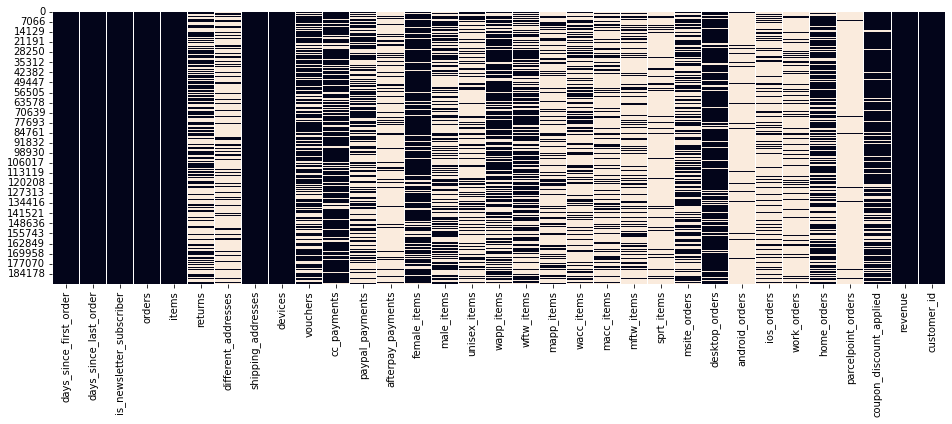

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize = (16,5))

fig = sns.heatmap(df == 0 , cbar=False)


What's really interesting here is that make_items and female items are most of the time mutually excludes each other. That means are large portion of people who bought man items do not buy female items and vice versa. If we find such polarization, we can then safe to set labels to some of these samples.

In [25]:
num_male_not_buy_female = df[df.male_items != 0][df.female_items == 0].__len__()
num_female_not_buy_male = df[df.male_items == 0][df.female_items != 0].__len__()
num_buy_one_gender = num_male_not_buy_female + num_female_not_buy_male 
print(f"{num_buy_one_gender/num_data_orig*100}% of people who buy items by one gender only")

66.08081050986215% of people who buy items by one gender only


/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


I'm really happy until here..it's great to see the polarization in buying behaviors (e.g: extreme case of only buy items of one gender). So here, we are safe to say who only buy item from 1 gender indeed reflect the gender of the buyers. Because buying reflects the use case of the beholders.

But here's the catch: They can also be buying gifts for others too! But we can filter this out with number of orders >= 3. 

In [26]:
male_not_buy_female_df = df[df.male_items != 0][df.female_items == 0][df.orders >=3]
female_not_buy_male_df = df[df.male_items == 0][df.female_items != 0][df.orders >=3]
num_buy_one_gender = len(male_not_buy_female_df) + len(female_not_buy_male_df) 
print(f"{num_buy_one_gender/num_data_orig*100}% of people who buy items by one gender only (extreme polarized items)")

32.91598488135629% of people who buy items by one gender only (extreme polarized items)


/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Here we're safe to set labels to 33% of the data with "extreme genders" purchase, note that we also have a risk of wrongly labeled, however we will consider benign through rigorous filters.

In [27]:
male_not_buy_female_df["female_flag"] = 0
female_not_buy_male_df["female_flag"] = 1

# Merge two df
labeled_df =pd.concat([male_not_buy_female_df, female_not_buy_male_df])[["female_flag","customer_id"]]

In [28]:
labeled_df.head()

,female_flag,customer_id
7,0,3.017372e+09
30,0,3.018459e+09
82,0,3.020737e+09
86,0,3.020872e+09
88,0,3.020897e+09


In [29]:
# Remove labeled data from master df
df = df.drop(labeled_df.index)

We have 67% of data left to be labeled. Let's continue to consider the case of gifting. It's ok for one to gift, but what it will also keep the polarized effect I've mentioned. 

In [30]:
df["male_items_rate"] = df.male_items/(df["male_items"] + df["female_items"])

<AxesSubplot:>

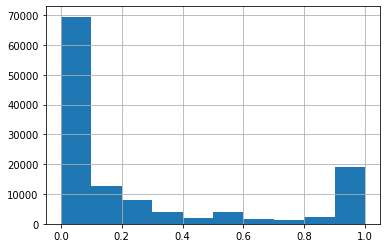

In [31]:
df["male_items_rate"].hist(bins=10)

See the polarized? It's very shallow in the midle but increase towards 2 tails. This mean most people will buy towards specific genders. Plot twist: If this their buying behaviors actually reflects their gender, we can tell that women are more likely to buy male items than men buying female items.

But look at the small pump at the middle, that is the uncertainty that we cannot solve with only this feature.

At this time, we will label:
- who buy > 80% of male items are actually male
- who buy < 20% of male items are female
- between are not labeled, they are uncertain

And this is safe to say, also we have more labels. Also remember to filter with num orders > 3

In [32]:
 # truncated df from last round
mostly_male_item_df = df[df.male_items_rate >= 0.8][df.orders >= 3]
mostly_female_item_df = df[df.male_items_rate <= 0.2][df.orders >= 3]
num_polarized_buying = len(mostly_male_item_df) + len(mostly_female_item_df)

print(f"{num_polarized_buying/num_data_orig*100}% of customers has soft polarized buying habit") 

21.3532545337634% of customers has soft polarized buying habit


/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/patrick/miniconda3/envs/gfg/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# Labeleling
mostly_male_item_df["female_flag"] = 0
mostly_female_item_df["female_flag"] = 1

# Merge together
soft_polarized_df = pd.concat([mostly_male_item_df, mostly_female_item_df])[["female_flag","customer_id"]]

# Add to accummulated labels
labeled_df = pd.concat([labeled_df, soft_polarized_df])

In [34]:
len(labeled_df)

103810

In [35]:
labeled_df.to_csv("partial_labels.csv", index=False)

In [36]:
print(f"We have {len(labeled_df)/num_data_orig*100}% data labeled")

We have 54.269239415119685% data labeled


This is a good start, we have safe label, then we can use this data for predict the other half uncertainty.